### Importação dos dados



In [134]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

lojas['Loja 1'].head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [136]:
lojas_faturamento = {}
for loja, df in lojas.items():
  lojas_faturamento[loja] = df['Preço'].sum()

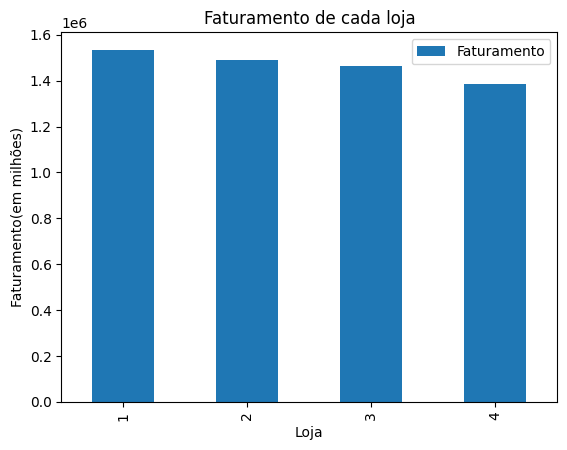

In [179]:
faturamento = pd.DataFrame({
    'Loja': [1, 2, 3, 4],
    'Faturamento': lojas_faturamento.values()
})

faturamento.plot(x='Loja', y='Faturamento', kind='bar')
plt.title('Faturamento de cada loja')
plt.ylabel('Faturamento(em milhões)')
plt.xlabel('Loja')
plt.show()

# 2. Vendas por Categoria

In [139]:
lojas_vendas_categoria = {}
for loja, df in lojas.items():
  lojas_vendas_categoria[loja] = df.groupby('Categoria do Produto').size().rename(loja)

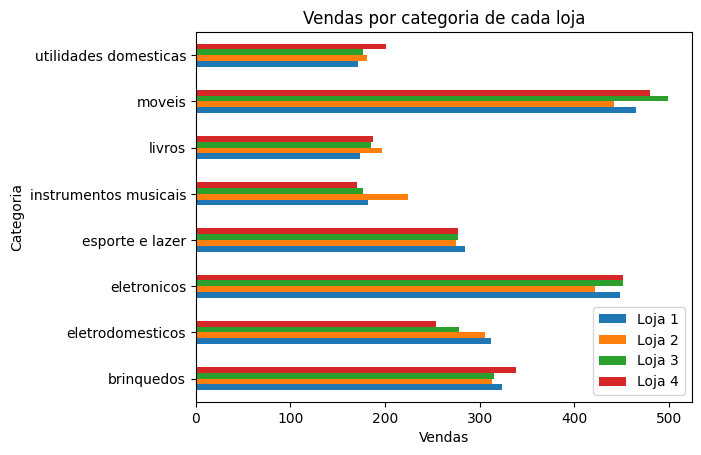

In [150]:
vendas_categoria = pd.concat(lojas_vendas_categoria.values(), axis=1)

vendas_categoria.fillna(0, inplace=True)
vendas_categoria.plot(kind='barh')
plt.title('Vendas por categoria de cada loja')
plt.ylabel('Categoria')
plt.xlabel('Vendas')
plt.show()

# 3. Média de Avaliação das Lojas


In [155]:
lojas_avaliacao_media = {}
for loja, df in lojas.items():
  lojas_avaliacao_media[loja] = df['Avaliação da compra'].mean().round()

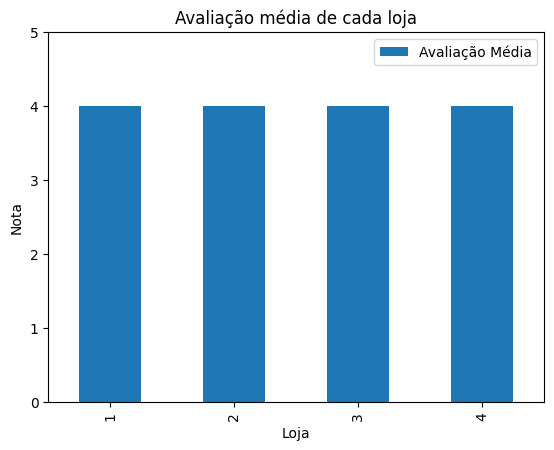

In [175]:
avaliacao_media = pd.DataFrame({
    'Loja': [1, 2, 3, 4],
    'Avaliação Média': lojas_avaliacao_media.values()
})

avaliacao_media.plot(x='Loja', y='Avaliação Média', kind='bar')
plt.title('Avaliação média de cada loja')
plt.ylim(0, 5)
plt.ylabel('Nota')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [158]:
lojas_vendas_produto = {}
for loja, df in lojas.items():
  lojas_vendas_produto[loja] = df.groupby('Produto').size().rename('Vendas')

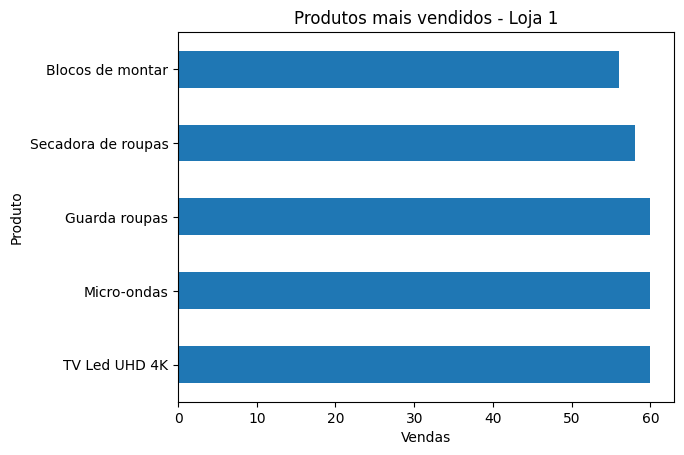

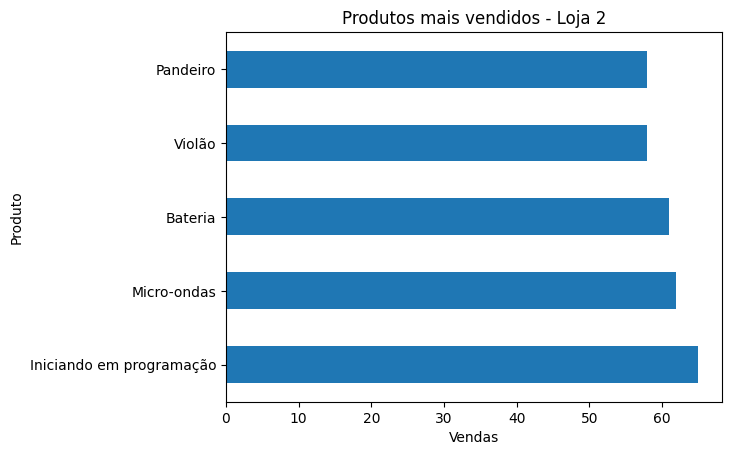

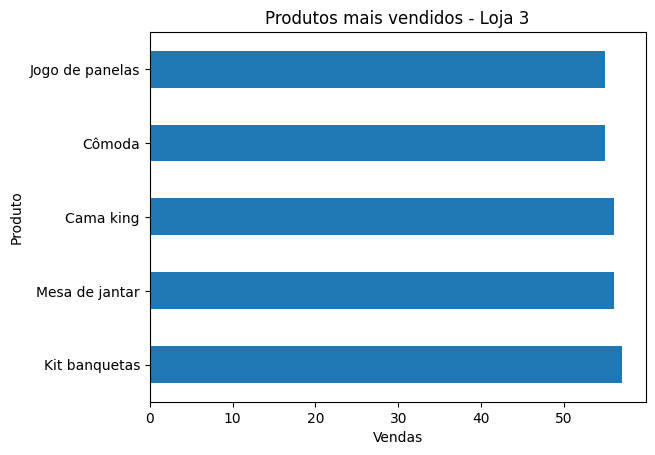

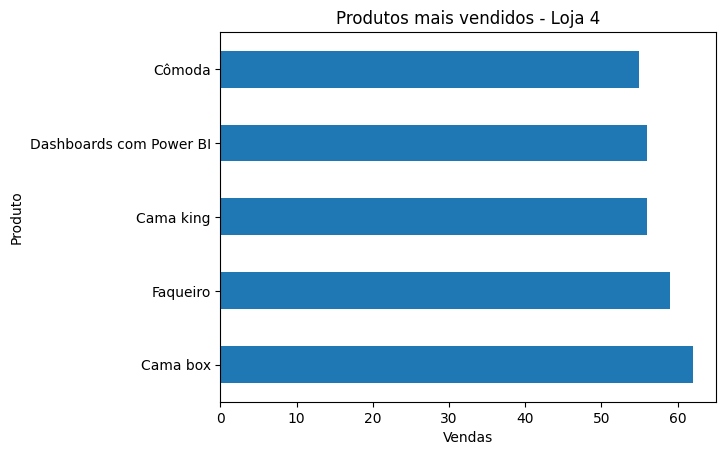

In [182]:
for loja, s in lojas_vendas_produto.items():
  mais_vendidos = s.sort_values(ascending=False).head(5)
  mais_vendidos.plot(kind='barh')
  plt.title(f'Produtos mais vendidos - {loja}')
  plt.xlabel('Vendas')
  plt.ylabel('Produto')
  plt.show()

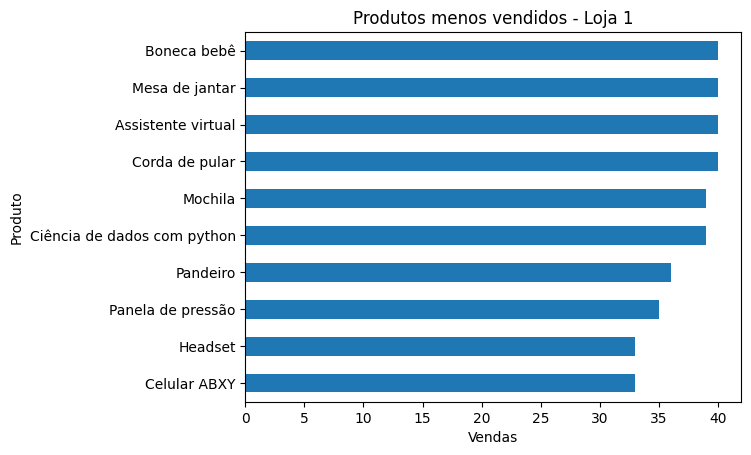

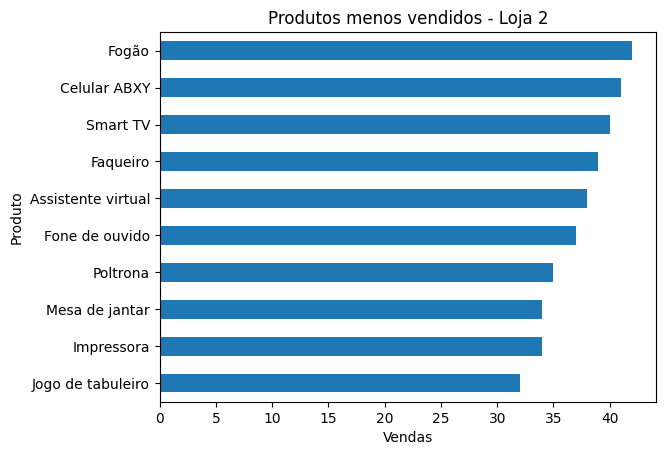

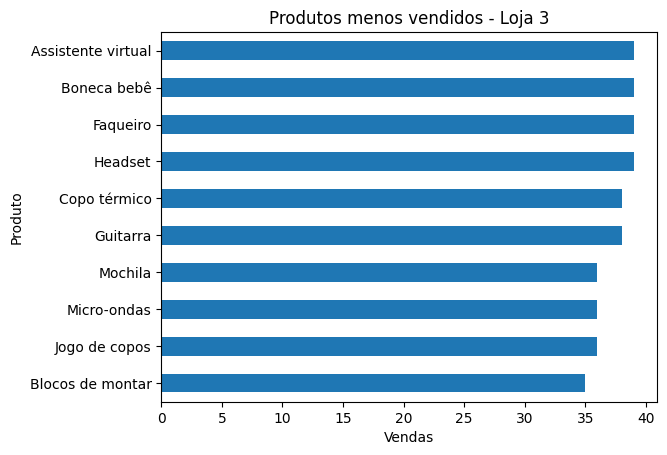

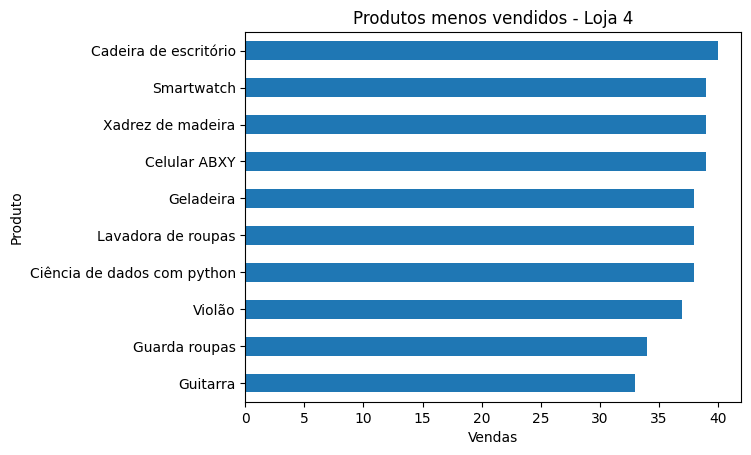

In [172]:
for loja, s in lojas_vendas_produto.items():
  menos_vendidos = s.sort_values(ascending=True).head(10)
  menos_vendidos.plot(kind='barh')
  plt.title(f'Produtos menos vendidos - {loja}')
  plt.xlabel('Vendas')
  plt.show()

# 5. Frete Médio por Loja

In [187]:
lojas_frete_medio = {}
for loja, dt in lojas.items():
  lojas_frete_medio[loja] = dt['Frete'].mean().round(2)

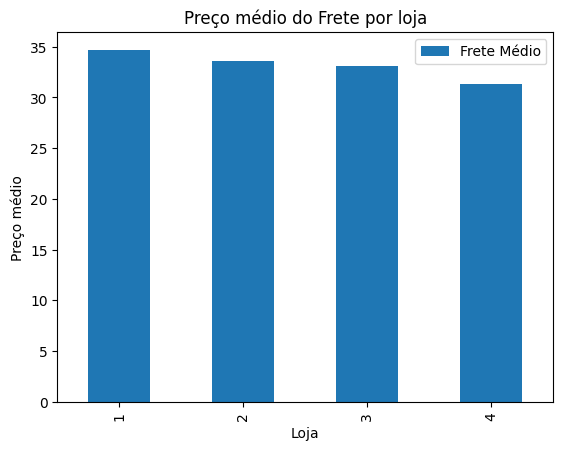

In [193]:
frete_medio = pd.DataFrame({
    'Loja': [1, 2, 3, 4],
    'Frete Médio': lojas_frete_medio.values()
})

frete_medio.plot(x='Loja', y='Frete Médio', kind='bar')
plt.title('Preço médio do Frete por loja')
plt.xlabel('Loja')
plt.ylabel('Preço médio')
plt.show()